In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import rstoolbox
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

# Scaffold adaptability to binder clash

In this example, the insertion of the BCL-2-like protein 11's binding motif to the early antigen protein R ([2WH6](http://www.rcsb.org/pdb/explore/explore.do?structureId=2wh6)) into the scaffold of the designed protein 4E10_D0_1ISEA_004_N ([3LHP](http://www.rcsb.org/pdb/explore/explore.do?structureId=3lhp)) would produce a design that will clash with the binder.  
By using a structure of a computationally designed inhibitor of an Epstein-Barr viral Bcl-2 protein ([4OYD](http://www.rcsb.org/pdb/explore/explore.do?structureId=4oyd)) as a target structure, we will see if folding the design in the presence of the binder will recuperate its 3D configuration (by shifting the correlative disposition of the alpha helices).  




|template|target|
|:------:|:------:|
|![template](bcl2/min_rms2target_templateonly.png)|![target](bcl2/min_rms2target_targetonly.png)|


In [5]:
experiments = [
    ("nocst",   "nobinder", "bcl2/bcl2_nocst_nobinder_2_minisilent.gz"),
    ("nocst",   "binder",   "bcl2/bcl2_nocst_binder_2_minisilent.gz"),
    ("ssecst",  "nobinder", "bcl2/bcl2_ssecst_nobinder_2_minisilent.gz"),
    ("ssecst",  "binder",   "bcl2/bcl2_ssecst_binder_2_minisilent.gz"),
    ("fullcst", "nobinder", "bcl2/bcl2_fullcst_nobinder_2_minisilent.gz"),
    ("fullcst", "binder",   "bcl2/bcl2_fullcst_binder_2_minisilent.gz")
]
selector_nobinder = {
    "scores":{
        "description": "description", "design_type": "type", "score": "score", "GRMSD2Target": "GRMSD2Target",
        "GRMSD2Template": "GRMSD2Template", "LHRMSD2Target": "LHRMSD2Target", "LRMSD2Target": "LRMSD2Target"
    }
}
selector_binder = {
    "scores":{
        "description": "description", "design_type": "type", "design_score": "score", "GRMSD2Target": "GRMSD2Target",
        "GRMSD2Template": "GRMSD2Template", "LHRMSD2Target": "LHRMSD2Target", "LRMSD2Target": "LRMSD2Target"
    }
}
dataframes = []
for experiment in experiments:
    dlist      = rstoolbox.api.read_rosetta_silent(experiment[2], experiment[0])
    definition = selector_nobinder if experiment[1] == "nobinder" else selector_binder
    df         = rstoolbox.api.process_from_definitions(dlist, definition)
    df = df.assign(condition=pd.Series([experiment[1]]*len(df["type"])).values)
    dataframes.append(df)
data = pd.concat(dataframes)

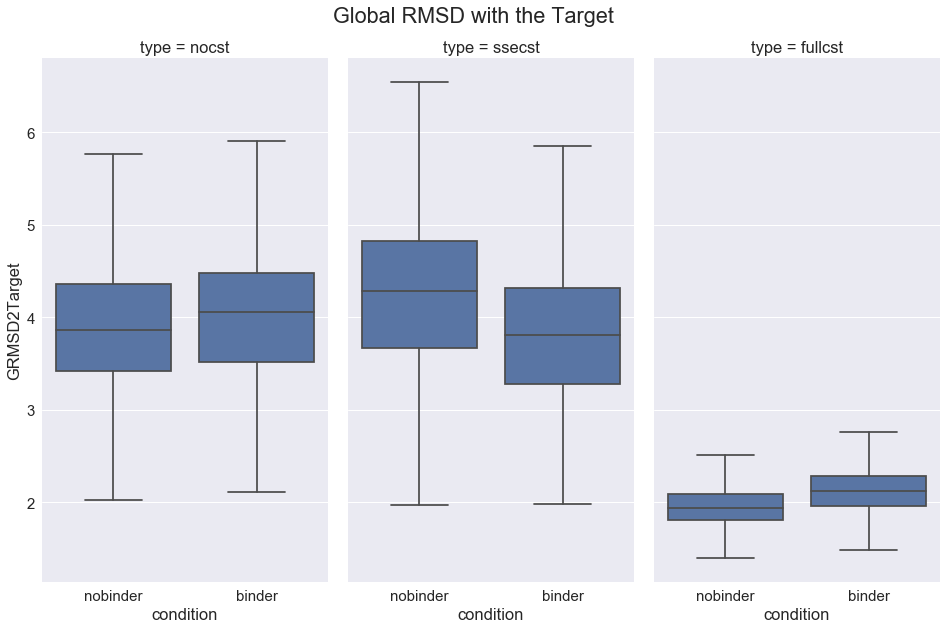

In [29]:
g = sns.FacetGrid(data, col="type", size=9, aspect=0.5)
g = g.map(sns.boxplot, "condition", "GRMSD2Target", showfliers=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Global RMSD with the Target')
sns.plt.show()

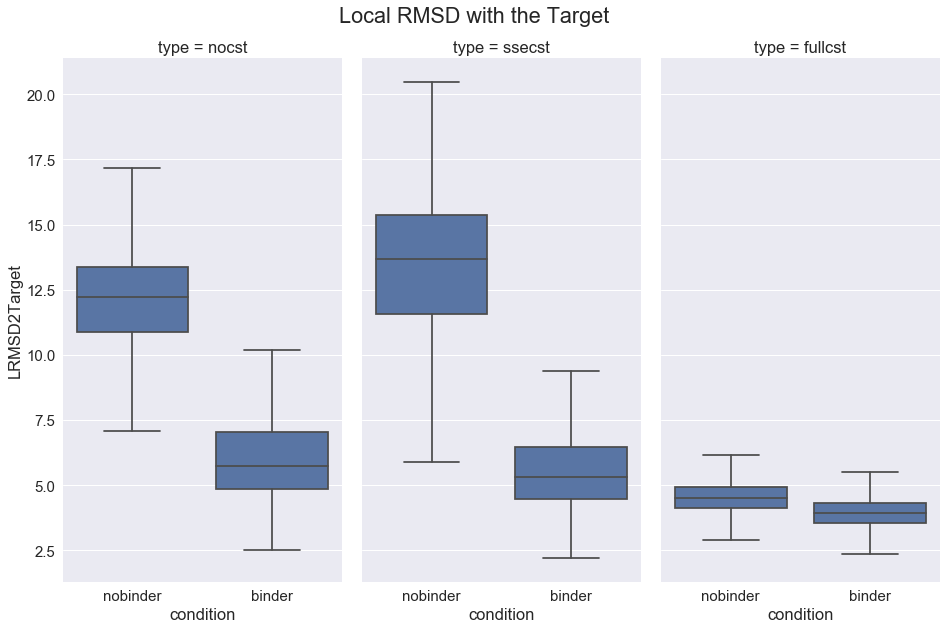

In [30]:
g = sns.FacetGrid(data, col="type", size=9, aspect=0.5)
g = g.map(sns.boxplot, "condition", "LRMSD2Target", showfliers=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Local RMSD with the Target')
sns.plt.show()

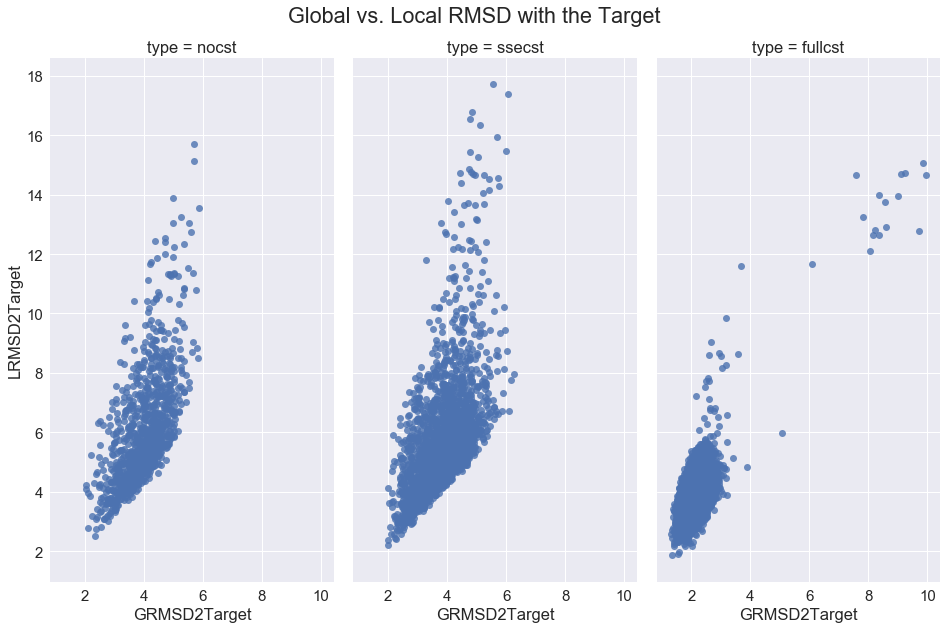

In [38]:
binderdata = data[(data["condition"] == "binder") & (data["LRMSD2Target"] < 20) & (data["GRMSD2Target"] < 10)]
g = sns.FacetGrid(binderdata, col="type", size=9, aspect=0.5)
g = g.map(sns.regplot, "GRMSD2Target", "LRMSD2Target", fit_reg=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Global vs. Local RMSD with the Target')
sns.plt.show()